In [1]:
#

In [9]:
# 필요한 import
import numpy as np
import matplotlib.pylab as plt

In [10]:
#계단 함수 구현하기(실수만 가능 배열불가능)
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

# 계단 함수 구현하기(배열까지 가능)
def step_function2(x):
    return np.array(x > 0, dtype=int)

In [4]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [6]:
y = x > 0
y

array([False,  True,  True])

In [8]:
y = y.astype(int)
y

array([0, 1, 1])

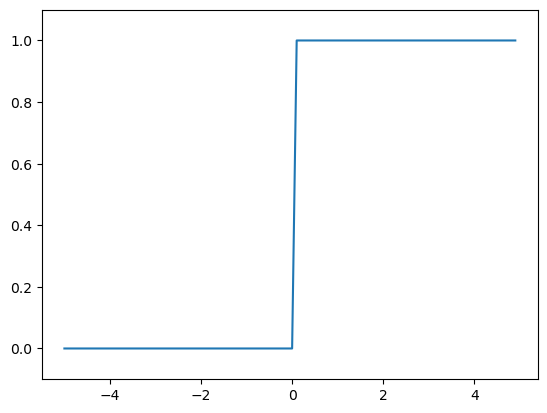

In [20]:
# 계단 함수 그래프 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = step_function2(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위지정
plt.show()

In [13]:
# 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x)


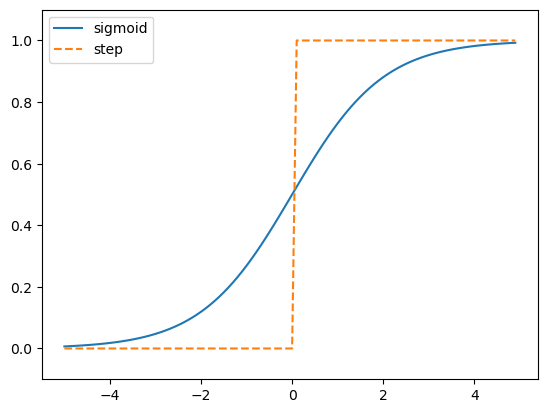

In [21]:
plt.plot(x, y2, label="sigmoid")
plt.plot(x, y, linestyle="--", label="step")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

In [22]:
# ReLU 함수 (Redified Linear Unit 렐루)
def relu(x):
    return np.maximum(0,x) # maximum은 넘파이의 함수로 두 입력 중 큰 값을 선택해서 반환하는 함수

# 다차원 배열의 계산

신경망을 효율적으로 구현 가능


In [29]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [30]:
np.ndim(A) # ndim 디멘션의 약자일듯 차원

1

In [31]:
A.shape

(4,)

In [32]:
A.shape[0]

4

In [33]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [34]:
np.ndim(B)

2

In [35]:
B.shape # 튜플값의 첫번째는 처음차원에 원소의 갯수 두번째는 두번째 차원의 원소갯수 이다.

(3, 2)

In [37]:
# 행렬의 곱 numpy 함수인 dot 으로 계산
# np.dot() 은 입력이 1차원이면 벡터로 계산, 2차원 배열이면 행렬 곱을 계산
# 한 가지 주의해야 할 것은 np.dot(A, B) 와 np.dot(B, A)값이 다를 수 있다는 것
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [41]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
print(B)
print(np.dot(A, B))

# 여기서 주의해야하는 것은 A기준으로 dot을 하게되면
# A의 첫번째 차원의 원소수(열 수)와 B의 0번째 차원의 원소수(행 수) 가 같아야한다.
# 쉽게표현해서 다음과 같은 것이다

# 1 2 3        1 2  
# 4 5 6        3 4  
#              5 6  

# 보는 것과 같이 3개의 열이고 두번째는 3개의 행이다.
# 3 x 2 2 X 4 = 3 X 4
# -   - -   -   -   -
# |   |_|   |   |   |
# |_________|___|   |
#           |_______|

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


# 신경망에서의 행렬 곱


In [43]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3층 신경망 구현하기
- 입력, 출력까지의 처리(순방향 처리) 구현
- numpy의 다차원 배열을 사용
- 3층 신경망은 입력층(0층) 2개 , 첫번째 은닉층(1층)은 3개, 두번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성

In [44]:
# 입력층에서 '1층의 첫번째 뉴런'으로 가는 신호

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1

In [46]:
print(A1)
Z1 = sigmoid(A1)

[0.3 0.7 1.1]


In [47]:
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [48]:
# 1층에서 2층으로 신호전달

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [49]:
# 1, 2층의 전달은 똑같다 하지만 활성화 함수만 지금까지의 은닉층과 다르다
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3) # 혹은 Y = A3

In [50]:
print(Y)

[0.31682708 0.69627909]


# 지금까지의 3층 신경망 정리

In [52]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) +  b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 신경망 출력층 설계

- 분류, 회귀로 나누어짐
- 일반적으로 회귀에는 항등함수
- 분류에는 소프트맥스 함수
- 예를들자면 사진속 성별을 알아내는 것은 분류 사진속 사람이 몇 kg인지 예측하는 것은 회귀

## 항등 함수와 소프트 맥스 함수 구현하기

- 항등 함수(identity function)는 입력을 그대로 출력
- 입력과 출력이 항상 같다고 하여 항등이다.

In [53]:
# 소프트맥스 함수 구현
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [54]:
# 함수로 정의
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

## 소프트맥스 함수 구현시 주의점
- 식은 잘만들어졌습니다.
- 오버플로문제가 있다.
- 소프트맥스 함수는 지수 함수를 사용하는데 아주 큰 값을 내뱉는다.
- 그리고 이런 큰값들로 나눗셈을하면 결과 수치가 불안정해진다.
- 수식을 수정해야한다.

In [55]:
a = np.array([1010, 1000, 900])
np.exp(a) / np.sum(np.exp(a))

/var/folders/30/f3f0m5856c5506pjbr3pznjc0000gn/T/ipykernel_70386/2307151752.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/var/folders/30/f3f0m5856c5506pjbr3pznjc0000gn/T/ipykernel_70386/2307151752.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [56]:
# softmax함수 수정
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [59]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [58]:
np.sum(y)

1.0

## 소프트맥스 함수의 특징

- 보는 것처럼 출력은 0부터 1사이의 실수로 나타낸다
- 총합은 무조건 1.0이다.
- 이 덕분에 소프트 맥스 함수의 출력을 '확률'로 해석가능하다.
- 주의점으로 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.

In [74]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.0937


데이터를 특정 범위로 변환하는 처리를 정규화, 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리라 한다.

## 배치 처리

- 입력 데이터와 가중치 매개변수의 '형상'에 주의해서 조금 전의 구현을 살펴본다.
- 하나로 묶은 입력 데이터를 배치라한다. 예를들면 1장의 이미지가 아닌 100장의 이미지를 한번에 입력하는경우


In [75]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'],network['W2'],network['W3']

In [77]:
x.shape

(10000, 784)

In [78]:
x[0].shape

(784,)

In [82]:
W1.shape # 1층

(784, 50)

In [83]:
W2.shape # 2층

(50, 100)

In [84]:
W3.shape # 3층

(100, 10)

## 배치처리 구현


In [85]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.0937
